# Linear Model. Support Vector Classifier
## Images Segmentation

In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2
from sklearn.svm import LinearSVC, SVC

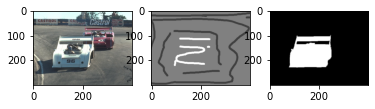

In [47]:
#filename = '86016.bmp'
filename = '21077.bmp'
img = cv2.imread('../datasets/imagenes_segmentacion/images/'+filename)
mask = cv2.imread('../datasets/imagenes_segmentacion/bordes_mr/'+filename)
real = cv2.imread('../datasets/imagenes_segmentacion/bordes_real/'+filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure()
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(mask)
plt.subplot(1,3,3)
plt.imshow(real)
plt.show()

In [48]:
print('img', img.shape)
print('mask', mask.shape)
print('real', real.shape)
nrows, ncols, nch = img.shape
#Image Vectorization
Ximg = np.reshape(img, (nrows*ncols, nch))
Xmask = np.reshape(mask, (nrows*ncols, nch))[:, 0]
Xreal = np.reshape(real, (nrows*ncols, nch))[:, 0]
print('Ximg', Ximg.shape)
print('Xmask', Xmask.shape)
print('Xreal', Xreal.shape)

img (300, 400, 3)
mask (300, 400, 3)
real (300, 400, 3)
Ximg (120000, 3)
Xmask (120000,)
Xreal (120000,)


In [49]:
values = np.unique(Xmask)
print(values)

[ 64 128 255]


In [50]:
Xobj = Ximg[Xmask == 255, :]
Xbck = Ximg[Xmask == 64, :]
Xtrain = np.concatenate((Xobj, Xbck), axis = 0)
Yobj = np.ones((len(Xobj)))*255
Ybck = np.zeros((len(Xbck)))
Ytrain = np.concatenate((Yobj, Ybck), axis = 0)
print('Xobj', Xobj.shape)
print('Xbck', Xbck.shape)
print('Xtrain', Xtrain.shape, 'Ytrain', Ytrain.shape)

Xobj (4079, 3)
Xbck (17639, 3)
Xtrain (21718, 3) Ytrain (21718,)


In [56]:
model = LinearSVC()
model.fit(Xtrain, Ytrain)
Xpred = model.predict(Ximg)

C:\Users\lalor\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


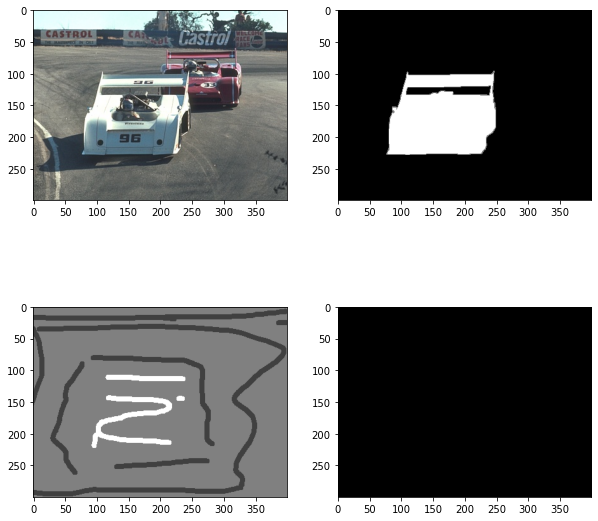

In [57]:
pred = np.reshape(Xpred, (nrows, ncols))
plt.figure(figsize = (10, 10))
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.subplot(2, 2, 2)
plt.imshow(real, cmap = 'gray')
plt.subplot(2, 2, 3)
plt.imshow(mask, cmap = 'gray')
plt.subplot(2, 2, 4)
plt.imshow(pred, cmap = 'gray')
plt.show()

C:\Users\lalor\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


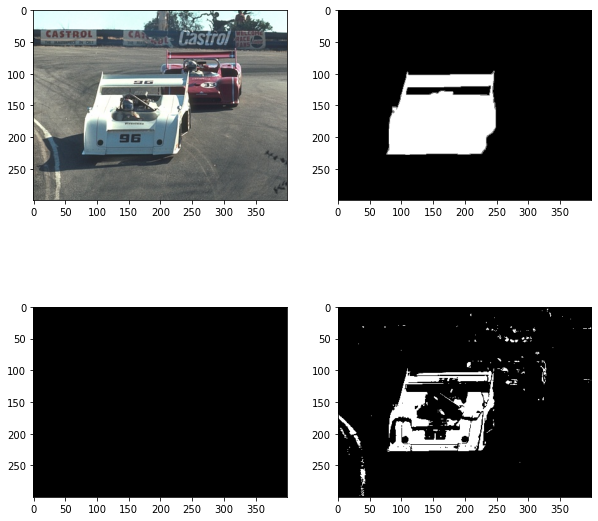

In [53]:
modelL = LinearSVC()
modelL.fit(Xtrain, Ytrain)
XpredL = modelL.predict(Ximg)
predL = np.reshape(XpredL, (nrows, ncols))
model = SVC()
model.fit(Xtrain, Ytrain)
Xpred = model.predict(Ximg)
pred = np.reshape(Xpred, (nrows, ncols))

plt.figure(figsize = (10, 10))
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.subplot(2, 2, 2)
plt.imshow(real, cmap = 'gray')
plt.subplot(2, 2, 3)
plt.imshow(predL, cmap = 'gray')
plt.subplot(2, 2, 4)
plt.imshow(pred, cmap = 'gray')
plt.show()